In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("/home/k8user/Akhil_HateSpeech/Dataset/labeled_data.csv")

In [19]:
df = df.drop('Unnamed: 0', axis=1)

In [20]:
df.head(3)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [21]:
df.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

In [22]:
df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [23]:
df.groupby("class").describe()

count                                              hate_speech  \
         count      mean       std  min  25%  50%  75%  max       count   
class                                                                     
0       1430.0  3.108392  0.648084  3.0  3.0  3.0  3.0  9.0      1430.0   
1      19190.0  3.268890  0.923024  3.0  3.0  3.0  3.0  9.0     19190.0   
2       4163.0  3.172712  0.746097  3.0  3.0  3.0  3.0  9.0      4163.0   

                 ... offensive_language       neither                      \
           mean  ...                75%  max    count      mean       std   
class            ...                                                        
0      2.256643  ...                1.0  4.0   1430.0  0.095804  0.326007   
1      0.180459  ...                3.0  9.0  19190.0  0.084888  0.284093   
2      0.062935  ...                1.0  4.0   4163.0  2.845544  0.795181   

                                
       min  25%  50%  75%  max  
class                           
0      0.0  0.0  0.0  0.0  4.0  
1      0.0  0.0  0.0  0.0  3.0  
2      2.0  2.0  3.0  3.0  9.0  

[3 rows x 32 columns]

In [ ]:
#df.groupby("class").describe()["class"==0]
sum(df["class"]==0)

In [ ]:
df["class"].value_counts()

In [ ]:
def percentage_class(idx):
    Percentage = 100 * float(sum(df["class"]==idx))/float(len(df["class"]))
    return Percentage


In [ ]:
print("the percenatge of '0' class", percentage_class(0))
print("the percenatge of '1' class", percentage_class(1))
print("the percenatge of '2' class", percentage_class(2))

In [ ]:
#ploting percentage of each class
df["class"].value_counts().plot(kind='pie',autopct='%1.1f%%')

Finding out the Maximum length tweet



In [ ]:
df['length'] = df['tweet'].apply(len)
df.head()

In [ ]:
df['length'].plot(bins=50, kind='hist')

#Feature generation

Here copying the data from **df** to **dataF** and creating new variable with same data

In [ ]:
#copying data from original variable to another varible.

dataF = df.copy()

In [ ]:
#Viewing top 3 rows in the data set

dataF.head(3)

In [ ]:
dataF.head(5)

In [ ]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords            ## it will check stop words present in data
from nltk.stem.porter import PorterStemmer   ## it will use for stemmming the words
from nltk.stem import WordNetLemmatizer
from nltk.tag import StanfordPOSTagger

In [ ]:
# !pip install contractions

In [ ]:
import contractions
def con(words):
    return [contractions.fix(word) for word in words.split()]    #For expanding Contractions

In [ ]:
# dataF['Contractions']=dataF['tweet'].apply(lambda x: con(x))

In [ ]:
dataF.head()

In [ ]:
#!pip install TextBlob
#from textblob import TextBlob

In [ ]:
#!pip install gingerit

In [ ]:
#from gingerit.gingerit import GingerIt
#parser = GingerIt()
#tweet=parser.parse(dataF['tweet'][23])
#tweet

In [ ]:
#blob=TextBlob(dataF['tweet'][23])
#blob.correct()

In [40]:
# Expanding whatsapp language slangs

import csv
import re

def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "/home/k8user/HateSpeech/HateSpeechNew/PreProcessing/sms_slang_translator-master/slang.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if str(_str).upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    return ' '.join(user_string)

In [41]:
dataF['ExpandedSlangs']=dataF['tweet'].apply(lambda x: translator(x)) 

In [42]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [43]:
dataF['Preprocessed_Initial']=dataF['ExpandedSlangs'].apply(lambda x: con(x)) #Contractions for expanded slangs

In [44]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s..."
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi..."


In [45]:
# import nltk
# nltk.download('stopwords')

In [46]:
# import nltk
# nltk.download('wordnet')

In [47]:
# import nltk
# nltk.download('punkt')

In [48]:
# Preprocessing the tweets.

import nltk
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
 
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    #for text in sentence:
    #  if text in ['html','www','http','https','rt']:
    #sentence= [sentence.replace(w,'') for w in sentence if w in ['html','www','http','https','rt']]
    sentence=sentence.replace('rt',"")
    sentence=sentence.replace('www',"")
    sentence=sentence.replace('http',"")
    sentence=sentence.replace('https',"")
    sentence=sentence.replace('html',"")
    sentence=sentence.replace('*',"")
    sentence=sentence.replace('#',"")
    cleanr = re.compile('<.?>')
    cleantext1 = re.sub(cleanr, '', sentence)
    cleantext = re.sub('@[^\s]+','',cleantext1)
#     rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', cleantext)
    tokenizer = RegexpTokenizer(r'\w+')
    #tokenizer = RegexpTokenizer("[\w']+")
    tokens = tokenizer.tokenize(rem_num)
    #tokens = word_tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2] # if not w in stopwords.words('english')]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    #lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)

In [49]:
dataF['PreprocessedTweet']=dataF['Preprocessed_Initial'].map(lambda s:preprocess(s))
#dataF['tweet_prepro'] = dataF['tweet'].apply(lambda x: preprocess(x))
#dataF['tweet_prepro'].tail()

In [50]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...


In [51]:
def tokenize(text):
    tokens = re.split(" ",text) 
    return tokens

In [52]:
dataF['final_tweet_tokens'] = dataF['PreprocessedTweet'].apply(lambda x: tokenize(x))

In [53]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet,final_tweet_tokens
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...,"[woman, you, should, not, complain, about, cle..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...,"[boy, that, cold, tyga, down, bad, for, cuffin..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...,"[dog, you, ever, fuck, bitch, and, she, sta, c..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny,"[she, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...,"[the, shit, you, hear, about, might, true, mig..."


In [54]:
dataF['PreprocessedTweet'].head()

0    woman you should not complain about cleaning y...
1    boy that cold tyga down bad for cuffin that ho...
2    dog you ever fuck bitch and she sta cry you co...
3                                 she look like tranny
4    the shit you hear about might true might faker...
Name: PreprocessedTweet, dtype: object

In [55]:
# !pip install wordcloud

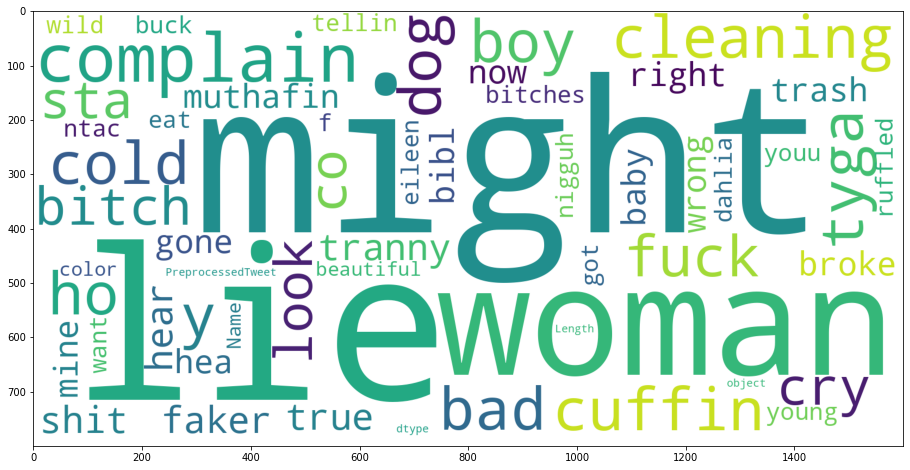

In [56]:
from wordcloud import WordCloud
word_c = WordCloud(collocations=False,background_color='white',mode='RGB',scale=4).generate(str(dataF['PreprocessedTweet']))
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,8),facecolor='w')
plt.imshow(word_c);

In [57]:
def lemmatizing(words):
    lemmatizer =WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [58]:
dataF['LemmaWords']=dataF['final_tweet_tokens'].apply(lambda x: lemmatizing(x))

In [59]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet,final_tweet_tokens,LemmaWords
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...,"[woman, you, should, not, complain, about, cle...","[woman, you, should, not, complain, about, cle..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...,"[boy, that, cold, tyga, down, bad, for, cuffin...","[boy, that, cold, tyga, down, bad, for, cuffin..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...,"[dog, you, ever, fuck, bitch, and, she, sta, c...","[dog, you, ever, fuck, bitch, and, she, sta, c..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny,"[she, look, like, tranny]","[she, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...,"[the, shit, you, hear, about, might, true, mig...","[the, shit, you, hear, about, might, true, mig..."


In [60]:
dataF['LemmaWords']

0        [woman, you, should, not, complain, about, cle...
1        [boy, that, cold, tyga, down, bad, for, cuffin...
2        [dog, you, ever, fuck, bitch, and, she, sta, c...
3                                [she, look, like, tranny]
4        [the, shit, you, hear, about, might, true, mig...
                               ...                        
24778    [you, muthafin, lie, right, his, trash, now, m...
24779    [you, have, gone, and, broke, the, wrong, hea,...
24780    [young, buck, want, eat, that, nigguh, like, a...
24781           [youu, got, wild, bitch, tellin, you, lie]
24782    [ruffled, ntac, eileen, dahlia, beautiful, col...
Name: LemmaWords, Length: 24783, dtype: object

In [61]:
# dataF.to_csv('Hate_spech_preprocessed.csv', index=False)

In [62]:
# !pip install keras

In [63]:
# !pip install tensorflow

In [64]:
# from keras.preprocessing.text import text_to_word_sequence

In [65]:
# dataF['KerasTokens']=dataF['PreprocessedTweet'].apply(text_to_word_sequence)

In [66]:
# dataF.head()

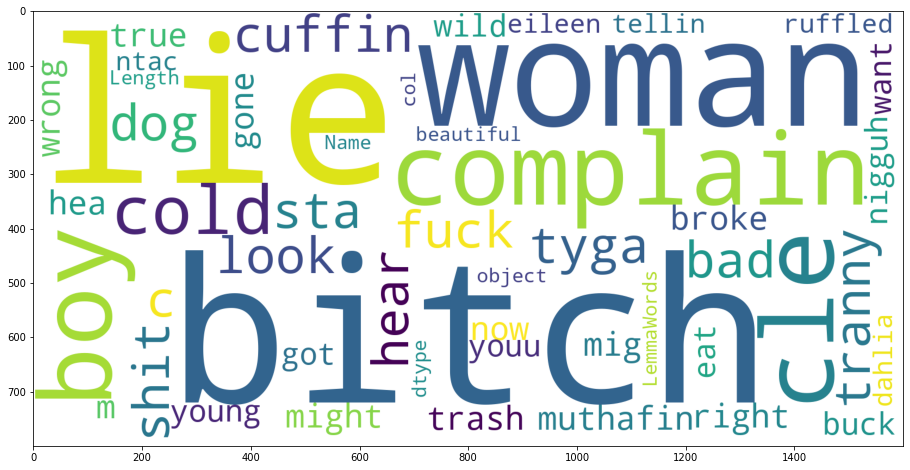

In [67]:
from wordcloud import WordCloud
word_c = WordCloud(collocations=False,background_color='white',mode='RGB',scale=4).generate(str(dataF['LemmaWords']))
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,8),facecolor='w')
plt.imshow(word_c);

In [68]:
dataF['Lemma_Preprocessed']=dataF['LemmaWords'].map(lambda s:preprocess(s))

In [69]:
from sklearn.feature_extraction.text import CountVectorizer 

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [70]:
common_words = get_top_n_words(dataF['Lemma_Preprocessed'], 250)
top_words=[]
for word, freq in common_words:
    print(word, freq)
    top_words.append(word)

bitch 11466
you 9282
the 7340
not 5041
that 4492
hoe 4347
and 3993
are 3063
like 2837
pussy 2265
all 2186
this 2165
for 2131
out 2054
nigga 2020
with 1854
got 1602
fuck 1575
get 1545
your 1544
they 1499
but 1489
just 1471
about 1406
she 1371
have 1337
when 1332
these 1323
shit 1300
trash 1165
her 1154
what 1085
laughing 1007
want 1002
loud 1000
will 964
amp 930
them 917
some 902
know 861
off 818
can 817
one 762
love 755
who 729
how 717
girl 701
cannot 675
would 641
fucking 631
because 625
bird 608
make 601
now 596
look 588
say 578
why 577
from 575
going 574
bad 573
man 568
then 554
faggot 545
his 543
good 538
need 533
too 522
think 499
time 496
hate 487
see 480
still 479
back 477
only 461
day 458
let 452
never 447
people 427
really 426
did 424
there 418
real 417
right 403
even 391
white 390
being 388
said 381
here 378
laugh 378
come 375
more 368
over 362
had 361
dick 360
call 357
their 351
head 348
wit 346
down 345
been 343
life 342
than 341
tell 340
stop 336
talk 331
take 328
damn 327

In [71]:
most_common = pd.DataFrame(common_words,columns=['words', 'count'])
most_common.head()

,words,count
0,bitch,11466
1,you,9282
2,the,7340
3,not,5041
4,that,4492


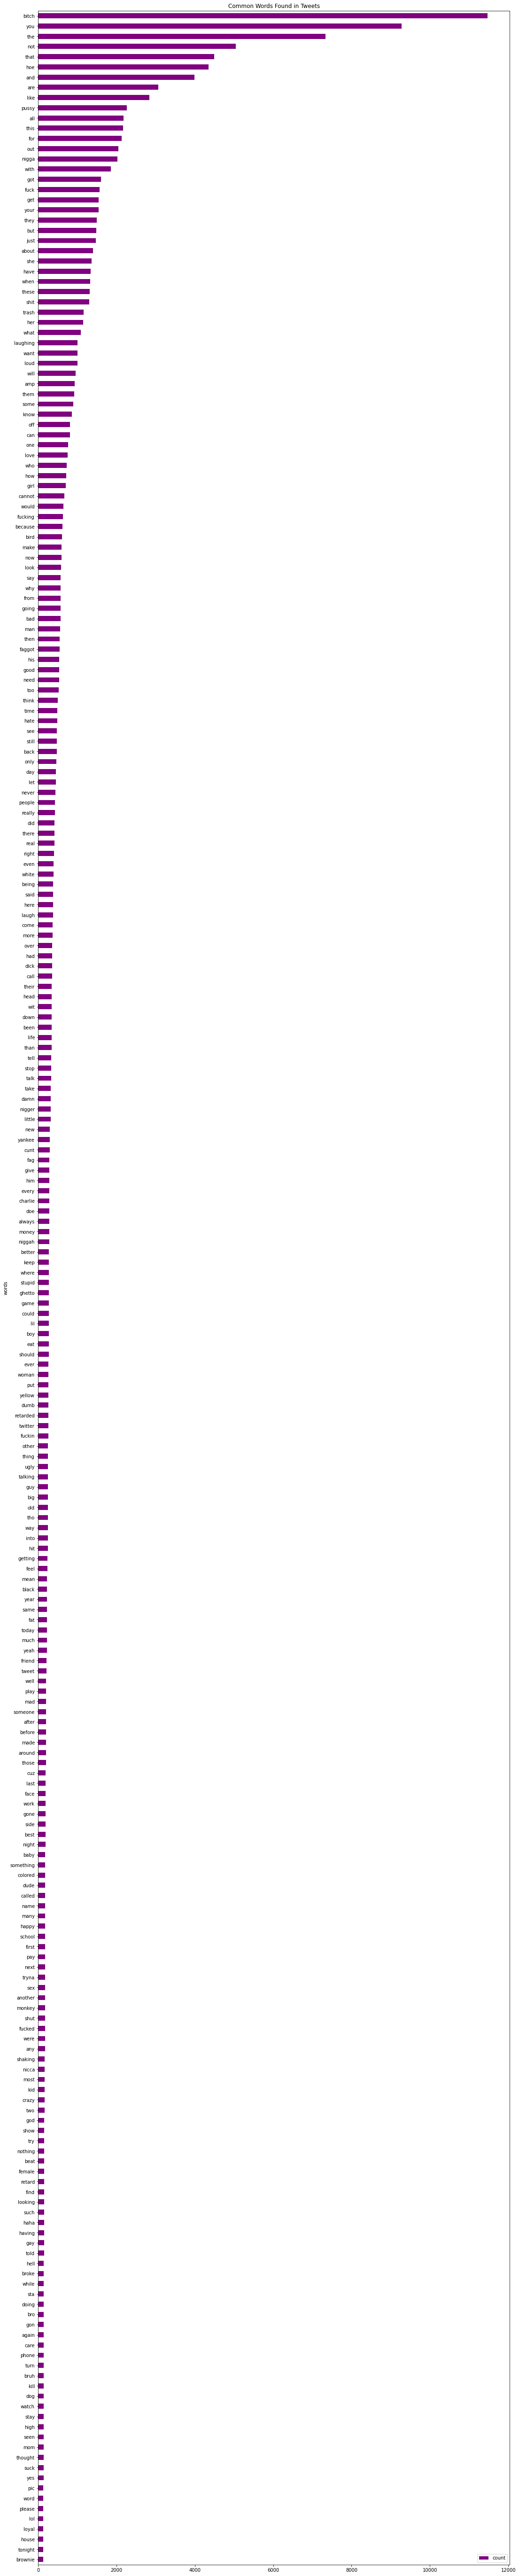

In [72]:
fig, ax = plt.subplots(figsize=(18, 100))

# Plot horizontal bar graph
most_common.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets")

plt.show()

# TF-IDF

In [61]:
# !pip install gensim

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [118]:
tfidf_vectorizer = TfidfVectorizer(min_df=50, max_features=1000, stop_words=None,tokenizer=tokenize,analyzer='word')
tfidf = tfidf_vectorizer.fit_transform(dataF['PreprocessedTweet'])
tfidf.shape

(24783, 590)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df=50, max_features=1000, stop_words=None,tokenizer=tokenize,analyzer='word',ngram_range=(1,3),norm='l2')
tfidf = tfidf_vectorizer.fit_transform(dataF['PreprocessedTweet'])
tfidf.shape

In [109]:
# tfidf_df = pd.read_csv("/home/k8user/Akhil_HateSpeech/Embeddings/TF-IDF/TF_IDF_Vectors.csv")

In [104]:
# tfidf_df = pd.DataFrame(tfidf_df.toarray())

In [112]:
# labs = dataF['class']

In [120]:
# tfidf_df_labels = pd.concat([tfidf_df,labs],axis=1)

In [122]:
# tfidf_df_labels.to_csv("/home/k8user/Akhil_HateSpeech/Embeddings/TF-IDF/TF_IDF_Vectors_labels.csv",index= False)

In [105]:
tfidf_df = tfidf_df.values

In [106]:
tfidf_df.shape

(24783, 589)

# Word2Vec

In [142]:
%%time

tokenized_tweet = dataF['PreprocessedTweet'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=1000, # desired no. of features/independent variables
            window=20, # context window size
            min_count=100, # Ignores all words with total frequency lower than 2.                                  
            sg = 0, # 1 for skip-gram model
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(dataF['PreprocessedTweet']), epochs=20)

CPU times: user 15.6 s, sys: 80.8 ms, total: 15.7 s
Wall time: 5.4 s


(1920639, 5134880)

In [143]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [145]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 1000)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 1000 )
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(24783, 1000)

# Doc2Vec

In [78]:
#!pip install --upgrade pandas==0.25.0

In [79]:
!pip install tqdm

In [81]:
from tqdm import tqdm 
#tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument

ImportError: cannot import name 'LabeledSentence' from 'gensim.models.doc2vec' (/home/dstuser/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py)

# LIWC

In [8]:
lw = pd.read_excel('/home/k8user/Akhil_HateSpeech/Final_Notebook/LIWC2015 Results (HateSpeech)-Apr13-2022.xlsx')

In [9]:
lw.drop('Source (A)',axis=1,inplace=True)

In [10]:
lw = lw.iloc[1:,:]

In [11]:
lw.shape

(24783, 93)

# LSTM

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk
import random

from collections import defaultdict
from collections import Counter

import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import adam_v2

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)


2022-04-16 15:10:26.064527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-16 15:10:26.064570: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [38]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.utils import to_categorical

In [36]:
X = lw

In [39]:
labels = to_categorical(df['class'], num_classes=3)

In [40]:
labels.shape

(24783, 3)

In [41]:
y = labels

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [43]:
X_train.shape,X_test.shape

((18587, 93), (6196, 93))

In [44]:
X_train = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

In [85]:
# embed_dim = [32,64,128,256]
# dropout=[0.1,0.3,0.5,0.7,0.9]
# batch_size=[32,64,128,256]

In [86]:
# embed_dim = [32,64,128,256]
# dropout=[0.3,0.7]
# batch_size=[32,64]

In [47]:
embed_dim = [128]
dropout=[0.75]
batch_size=[32]

In [91]:
# embed_dim = [32,64,128]
# dropout=[0.7,0.75]
# batch_size=[32,64,128]

In [48]:
from sklearn.model_selection import KFold

outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)

vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
pre = []
recl = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]

max_acc=0.0 ## maximum accuracy
max_f1s=0.0

best_ms_model=0.0

for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    X_train1,y_train1=X_train[train], y_train[train]
    X_val,y_val=X_train[test], y_train[test]
    
    for track_embed_dim in embed_dim:
        for track_dropout in dropout:
            for track_batch_size in batch_size:

                ms_model = Sequential()
                ms_model.add(LSTM(64,input_shape = X_train[0].shape,dropout=track_dropout))#,return_sequences = True)))
                ms_model.add(Dropout(0.7))
                ms_model.add(Dense(3, activation='softmax'))
                ms_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
                
                print(track_embed_dim,track_dropout,track_batch_size)

                ms_history = ms_model.fit(X_train1, y_train1, epochs=25, batch_size=track_batch_size)#,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

                loss, acc = ms_model.evaluate(X_val, y_val)
                print("\n")
                print("loss", loss)
                print("accuracy", acc)

                y_pred = ms_model.predict(X_val)

                y_pred = np.argmax(y_pred, axis=1)

                y_test1 = np.argmax(y_val, axis=1)
                
                f1_s = f1_score(y_test1, y_pred, average='micro')
                
                acc = accuracy_score(y_test1, y_pred)
                
                prc = precision_score(y_test1, y_pred, average='micro')
                
                rec = recall_score(y_test1, y_pred, average='micro')
                
                print("f1_score",f1_s)
                print("Precision",prc)
                print("Recall",rec)
                print("\n")

                if max_f1s < f1_s:
                    
                    max_f1s=f1_s
                    max_acc = acc
                    max_prc = prc
                    max_rec = rec
                    best_ms_model=ms_model#.copy()
                    best_embed=track_embed_dim
                    best_dropout=track_dropout
                    best_batch_size=track_batch_size
        ##
        
        y_pred = best_ms_model.predict(X_test)

        y_pred = np.argmax(y_pred, axis=1)

        y_test1 = np.argmax(y_test, axis=1)
        
        target_names=['Hate speech','Offensive language','neither']
        report = classification_report(y_test1, y_pred,target_names=target_names,output_dict=True)
        micro_F1 = f1_score(y_test1, y_pred, average='micro')
        macro_F1 = f1_score(y_test1, y_pred, average='macro')
        precision = precision_score(y_test1, y_pred, average='micro')
        recall = recall_score(y_test1, y_pred, average='micro')
                
        rac_precision.append(report['Hate speech']['precision'])
        rac_recall.append(report['Hate speech']['recall'])
        rac_f1score.append(report['Hate speech']['f1-score'])
        rac_support.append(report['Hate speech']['support'])

        se_precision.append(report['Offensive language']['precision'])
        se_recall.append(report['Offensive language']['recall'])
        se_f1score.append(report['Offensive language']['f1-score'])
        se_support.append(report['Offensive language']['support'])

        nei_precision.append(report['neither']['precision'])
        nei_recall.append(report['neither']['recall'])
        nei_f1score.append(report['neither']['f1-score'])
        nei_support.append(report['neither']['support'])
        
        accuracy.append(max_acc)
        micro_f1.append(micro_F1)
        macro_f1.append(macro_F1)
        pre.append(max_prc)
        recl.append(max_rec)
        #cm_score.append(cm)
          
        print("Fold",k+1)
        print('Best:',best_embed,best_dropout,best_batch_size)
        print('F1_score:',max_f1s)
        print('Test_micro_f1:', micro_F1)
        print('Test_macro_f1:', macro_F1)
        print('Precision:',precision)
        print('Recall:',recall)
        print("\n")
        

128 0.75 32
Epoch 1/25
523/523 [==============================] - 47s 77ms/step - loss: 0.6962 - acc: 0.7713
Epoch 2/25
523/523 [==============================] - 40s 77ms/step - loss: 0.6799 - acc: 0.7748
Epoch 3/25
523/523 [==============================] - 41s 79ms/step - loss: 0.6751 - acc: 0.7748
Epoch 4/25
523/523 [==============================] - 41s 79ms/step - loss: 0.6700 - acc: 0.7748
Epoch 5/25
523/523 [==============================] - 42s 80ms/step - loss: 0.6703 - acc: 0.7748
Epoch 6/25
523/523 [==============================] - 41s 79ms/step - loss: 0.6698 - acc: 0.7748
Epoch 7/25
523/523 [==============================] - 42s 80ms/step - loss: 0.6672 - acc: 0.7748
Epoch 8/25
523/523 [==============================] - 42s 80ms/step - loss: 0.6672 - acc: 0.7748
Epoch 9/25
523/523 [==============================] - 41s 79ms/step - loss: 0.6661 - acc: 0.7748
Epoch 10/25
523/523 [==============================] - 42s 81ms/step - loss: 0.6649 - acc: 0.7748
Epoch 11/25
523/5

523/523 [==============================] - 48s 91ms/step - loss: 0.6639 - acc: 0.7743
Epoch 22/25
523/523 [==============================] - 50s 96ms/step - loss: 0.6632 - acc: 0.7743
Epoch 23/25
523/523 [==============================] - 54s 103ms/step - loss: 0.6638 - acc: 0.7743
Epoch 24/25
523/523 [==============================] - 53s 102ms/step - loss: 0.6639 - acc: 0.7743
Epoch 25/25
59/59 [==============================] - 3s 25ms/step - loss: 0.6560 - acc: 0.7768


loss 0.6560052037239075
accuracy 0.7767617106437683
f1_score 0.7767616998386229
Precision 0.7767616998386229
Recall 0.7767616998386229


Fold 6
Best: 128 0.75 32
F1_score: 0.7810650887573964
Test_micro_f1: 0.7737249838605553
Test_macro_f1: 0.2908098271155596
Precision: 0.7737249838605552
Recall: 0.7737249838605552


128 0.75 32
Epoch 1/25
523/523 [==============================] - 58s 99ms/step - loss: 0.7087 - acc: 0.7654
Epoch 2/25
523/523 [==============================] - 53s 102ms/step - loss: 0.6849 - acc: 0.7

In [50]:
# summarize the estimated performance of the model            
# print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV accuracy: 0.781 +/- 0.006

CV micro F1: 0.774 +/- 0.000

CV macro F1: 0.291 +/- 0.000

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.000 +/- 0.000

CV Class : Hate speech Recall: 0.000 +/- 0.000

CV Class : Hate speech F1 score: 0.000 +/- 0.000

CV Class : Hate speech Support: 361.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.774 +/- 0.000

CV Class : Offensive language Recall: 1.000 +/- 0.000

CV Class : Offensive language F1 score: 0.872 +/- 0.000

CV Class : Offensive language Support: 4794.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.000 +/- 0.000

CV Class : Neither Recall: 0.000 +/- 0.000

CV Class : Neither F1 score: 0.000 +/- 0.000

CV Class : Neither Support: 1041.000 +/- 0.000


In [1]:
technique="LIWC"
model="LSTM.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

LIWC_LSTM.csv


NameError: name 'accuracy' is not defined

In [124]:
# ms_model = Sequential()
# ms_model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
# ms_model.add(SpatialDropout1D(0.7))
# ms_model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
# ms_model.add(Dense(3, activation='softmax'))
# ms_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# ms_model.summary()

In [125]:
# from tensorflow.keras.callbacks import EarlyStopping

In [126]:
# batch_size = 32
# # ms_history = ms_model.fit(X_train, y_train, epochs=25, batch_size=batch_size,validation_split=0.2)#,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

In [127]:
# loss, accuracy = ms_model.evaluate(X_test, y_test)
# print("loss", loss)
# print("accuracy", accuracy)

In [128]:
# y_pred = ms_model.predict(X_test)

In [129]:
# y_pred = np.argmax(y_pred, axis=1)

In [130]:
# y_test = np.argmax(y_test, axis=1)

In [131]:
# print(classification_report(y_test, y_pred))

In [132]:
# text = ['boy that cold tyga down bad for cuffin that hoe the place']
# text = ms_token.texts_to_sequences(text)
# text = pad_sequences(text, maxlen=max_len)
# res = ms_model.predict(text)
# res

In [133]:
# if np.argmax(res) == 0:
#     print("Hate speech")
# elif np.argmax(res) == 1:
#     print("Offensive language")
# elif np.argmax(res) == 2:
#     print("Neither")